In [0]:
! pip install japanize-matplotlib

# 縦グラフ

In [0]:
class BarGraphTemplate_v():
    import numpy as np
    import pandas as pd
    from pandas import Series,DataFrame
    import matplotlib
    import matplotlib.pyplot as plt
    import japanize_matplotlib
    import seaborn as sns
    
    %matplotlib inline
    
    def __init__(self):
        self.plt.style.use('seaborn-deep')
        self.plt.style.use('seaborn-darkgrid')
        self.plt.rcParams['axes.xmargin'] = 0.05
        self.plt.rcParams['axes.ymargin'] = 0.1
        self.sns.set(font="IPAexGothic")
        
        self.plt.figure(figsize=(11, 7),frameon=False)
        
        #左側数値、下側数値のサイズ
        self.plt.tick_params(labelsize=16)
        self.plt.grid(True)
        
     
    def check_maximum_x_num(self,data):
        x = [int(i) for i in data]
        if int(max(x)) < 10000:
            return x,"円"
        elif 10000 <= int(max(x)) < 100000000:
            return [i/10000 for i in x],"万円"
        elif 100000000 <= int(max(x)):
            return [i/100000000 for i in x],"億円"
        
    def check_label(self,label):
        label_container = []
        #年度表示を２桁に調整
        for i in label:
            if int(i) < 10:
                label_container.append(str(0)+str(i))
            else:
                 label_container.append(str(i))
        return label_container
     
    def autolabel(self,objects):
        #global max_x_num
        add_rate = self.max_x_num*0.01
        """
        bar上部に数値をつける関数
        """
        for object in objects:
            height = object.get_height()

            if height < 0:
                color = "red"
                _add_rate = add_rate*-1
                position = "top"
            else:
                color = "black"
                _add_rate = add_rate
                position = "bottom"
            #{0:g}表現は、1は1.0ではなく１で、0.1はそのまま0.1で表示する
            
            self.plt.text(object.get_x() + object.get_width()/2., height+_add_rate,
                    '{0:.0f}'.format(height),
                    ha='center', va=f'{position}', fontsize=16,color=color)
            
    def set_data(self,data,label,title):

        #単位をチェックして数値の桁を調整
        checked_origin_x_num,unit = self.check_maximum_x_num(data)
        self.plt.suptitle('({})'.format(unit),x=0.03,fontsize=13,y=0.93)
        self.plt.title(title,ha='center',y=1.07,fontsize=23)
        
        #グラフ表の数値に変換
        self.x_num = self.np.array(checked_origin_x_num)
        self.max_x_num = max(self.x_num)
        self.x_numbers = len(self.x_num)
        self.y_num = self.np.array([i for i in range(len(self.x_num))])
        self.cheked_label = self.check_label(label)
       
        objects = self.plt.bar(self.y_num,self.x_num,tick_label=self.cheked_label,color="#8a9bec",edgecolor='grey',linewidth=1)
        
        self.plt.hlines(0, 0, self.x_numbers-1, linestyle='solid', color="grey",linewidth=0.5)
        self.autolabel(objects)
        self.plt.tight_layout()#各要素がはみ出さないようにする。１番最後に
        
        self.plt.show()
        


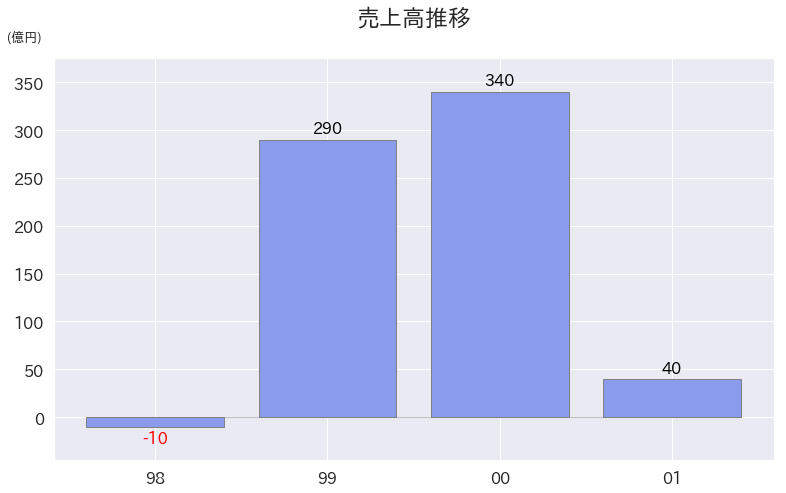

In [42]:
graph = BarGraphTemplate_v()
label = ["98", "99", "0", "1"]
origin_x_num = [-1000000000, 29000000000, 34000000000, 4000000006]
title = "売上高推移"

graph.set_data(data=origin_x_num,label=label,title=title)


### ラベル数や数値に応じて自動調節（億円->万円）

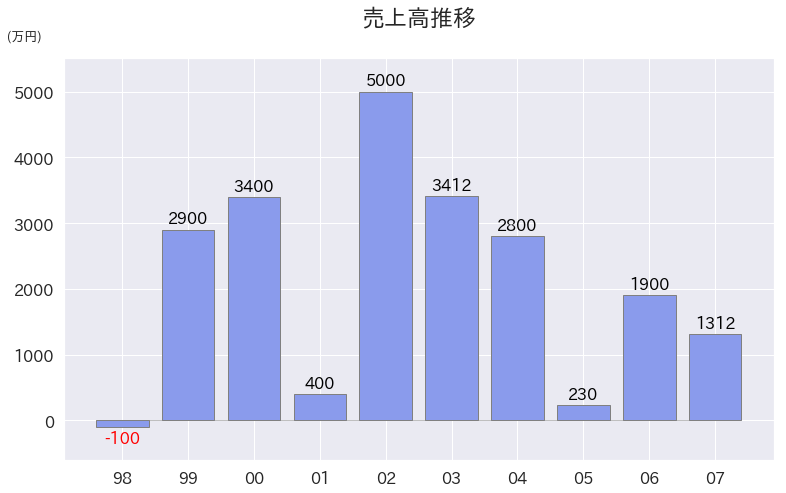

In [43]:
graph2 = BarGraphTemplate_v()
label = ["98", "99", "0", "1", "2", "3","4","5","6","7"]
origin_x_num = [-1000000, 29000000, 34000000, 4000006, 50000000,34123000, 28000000, 2300006, 19000000,13123000]
title = "売上高推移"

graph2.set_data(data=origin_x_num,label=label,title=title)

# 横グラフ

In [0]:
class BarGraphTemplate_h():
    import numpy as np
    import pandas as pd
    from pandas import Series,DataFrame
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    def __init__(self):
        self.plt.style.use('seaborn-deep')
        self.plt.style.use('seaborn-darkgrid')
        self.plt.rcParams['axes.xmargin'] = 0.2
        self.plt.rcParams['axes.ymargin'] = 0.1
        self.sns.set(font='IPAexGothic')
        self.plt.figure(figsize=(11, 9),frameon=False)
        
        #左側数値、下側数値のサイズ
        self.plt.tick_params(labelsize=16)
        self.plt.grid(True)
        
     
    def check_maximum_x_num(self,data):
        
        x = [int(i) for i in data]
        if int(max(x)) < 10000:
            return x,"円"
        elif 10000 <= int(max(x)) < 100000000:
            return [i/10000 for i in x],"万円"
        elif 100000000 <= int(max(x)):
            return [i/100000000 for i in x],"億円"
        
     
    def autolabel(self,objects):
        #global max_x_num
        add_rate = self.max_x_num*0.08
        """
        bar上部に数値をつける関数
        """
        for object in objects:
            width = object.get_width()
            
            if width < 0:
                color = "red"
                _add_rate = add_rate*-1
                position = "top"
            else:
                color = "black"
                _add_rate = add_rate
                position = "bottom"
            #{0:g}表現は、1は1.0ではなく１で、0.1はそのまま0.1で表示する
            self.plt.text(width+_add_rate, object.get_y() + object.get_height()/2., 
                    '{0:.0f}'.format(width),
                    ha='center', va=f'{position}', fontsize=16,color=color)
            
    def set_data(self,data,label,title):

        #単位をチェックして数値の桁を調整
        checked_origin_x_num,unit = self.check_maximum_x_num(data)
        self.plt.suptitle('({})'.format(unit),x=0.03,fontsize=13,y=0.93)
        self.plt.title(title,ha='center',y=1.07,fontsize=23)
        #グラフ表の数値に変換
        self.x_num = self.np.array(checked_origin_x_num)
        self.max_x_num = max(self.x_num)
        self.x_numbers = len(self.x_num)
        self.y_num = self.np.array([i for i in range(len(self.x_num))])
        self.cheked_label = label
       
        objects = self.plt.barh(self.y_num,self.x_num,tick_label=self.cheked_label,color="#8a9bec",edgecolor='grey',linewidth=1)
        
        self.plt.vlines(0, 0, self.x_numbers-1, linestyle='solid', color="grey",linewidth=0.5)
        #下側目盛り線を消す
        self.plt.tick_params(labelbottom=False)
        self.autolabel(objects)
        self.plt.tight_layout()#各要素がはみ出さないようにする。１番最後に
        self.plt.show()
        

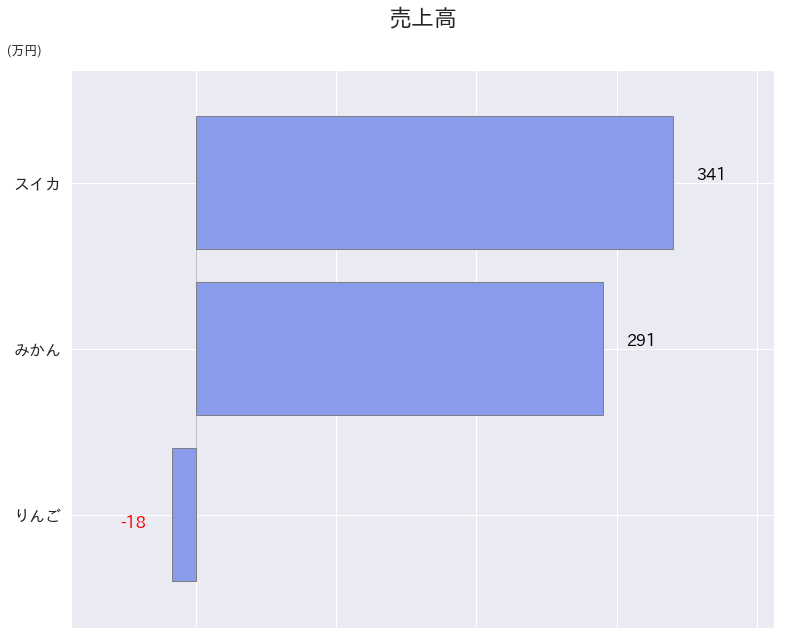

In [45]:
graph_h = BarGraphTemplate_h()
label = ["りんご", "みかん", "スイカ"]
origin_x_num = [-175675, 2905675, 3405675]
title = "売上高"

graph_h.set_data(data=origin_x_num,label=label,title=title)
